PROBLEM 4

In [70]:
from pgmpy.factors.discrete import JointProbabilityDistribution as JPD

In [71]:
problem4j = JPD(['A', 'B', 'C', 'D'], [2,2,2,2], [.0448, .0252, .0112, .0588, .0144, 
                                                            .0144, .0096, .0216, .1024, .0576, 
                                                            .0256, .1344, .1152, .1152, .0768, .1728])
print(problem4j)


+------+------+------+------+--------------+
| A    | B    | C    | D    |   P(A,B,C,D) |
+======+======+======+======+==============+
| A(0) | B(0) | C(0) | D(0) |       0.0448 |
+------+------+------+------+--------------+
| A(0) | B(0) | C(0) | D(1) |       0.0252 |
+------+------+------+------+--------------+
| A(0) | B(0) | C(1) | D(0) |       0.0112 |
+------+------+------+------+--------------+
| A(0) | B(0) | C(1) | D(1) |       0.0588 |
+------+------+------+------+--------------+
| A(0) | B(1) | C(0) | D(0) |       0.0144 |
+------+------+------+------+--------------+
| A(0) | B(1) | C(0) | D(1) |       0.0144 |
+------+------+------+------+--------------+
| A(0) | B(1) | C(1) | D(0) |       0.0096 |
+------+------+------+------+--------------+
| A(0) | B(1) | C(1) | D(1) |       0.0216 |
+------+------+------+------+--------------+
| A(1) | B(0) | C(0) | D(0) |       0.1024 |
+------+------+------+------+--------------+
| A(1) | B(0) | C(0) | D(1) |       0.0576 |
+------+--

In [72]:
print(problem4j.check_independence(['A'], ['B']))
print(problem4j.check_independence(['A'], ['C']))
print(problem4j.check_independence(['A'], ['C'], ('B',), condition_random_variable=True))
print(problem4j.check_independence(['A'], ['D']))
print(problem4j.check_independence(['A'], ['D'], ('C',), condition_random_variable=True))


False
False
True
True
False


Per code output:

4a. F

4b. F

4c. T

4d. T

4e. F


But I'm going to do some legwork to 'prove' these outputs.
For two nodes A and B to be independent, P(A|B) = P(A) and P(B|A) = P(B).

Bayes states P(B|A)P(A) = P(A,B), and so, using the above equalities, two events can be independent iff P(B)P(A) =  P(A,B). Showing this to be true using marginalized probabilities is sufficient for a,b, and d.

I couldn't figure out c and e in time so ignore the following:

For c and e, iff P(A,B|C) = P(A|C)P(B|C) then A,B are independent given C; also iff P(A|B,C) = P(A,B|C)/P(B|C) = P(A|C)P(B|C)/P(B|C) = P(A|C) where P(A|C) = P(A,C)/P(C). We show this by finding the marginal probability of C to find P(A,C) and P(B,C) to infer P(A|C) = P(A) and if P(B|C) = https://www.probabilitycourse.com/chapter1/1_4_4_conditional_independence.php

In [73]:
#4a.
#We see that P(B)P(A) != P(A,B) so dependent  
p = JPD(['A', 'B', 'C', 'D'], [2,2,2,2], [.0448, .0252, .0112, .0588, .0144, 
                                                            .0144, .0096, .0216, .1024, .0576, 
                                                            .0256, .1344, .1152, .1152, .0768, .1728])
p.marginalize(["D", 'C'])
print(p)

p = JPD(['A', 'B', 'C', 'D'], [2,2,2,2], [.0448, .0252, .0112, .0588, .0144, 
                                                            .0144, .0096, .0216, .1024, .0576, 
                                                            .0256, .1344, .1152, .1152, .0768, .1728])
p.marginalize(['A',"D", 'C'])
print(p)

p = JPD(['A', 'B', 'C', 'D'], [2,2,2,2], [.0448, .0252, .0112, .0588, .0144, 
                                                            .0144, .0096, .0216, .1024, .0576, 
                                                            .0256, .1344, .1152, .1152, .0768, .1728])
p.marginalize(['B',"D", 'C'])
print(p)


+------+------+----------+
| A    | B    |   P(A,B) |
+======+======+==========+
| A(0) | B(0) |   0.1400 |
+------+------+----------+
| A(0) | B(1) |   0.0600 |
+------+------+----------+
| A(1) | B(0) |   0.3200 |
+------+------+----------+
| A(1) | B(1) |   0.4800 |
+------+------+----------+
+------+--------+
| B    |   P(B) |
+======+========+
| B(0) | 0.4600 |
+------+--------+
| B(1) | 0.5400 |
+------+--------+
+------+--------+
| A    |   P(A) |
+======+========+
| A(0) | 0.2000 |
+------+--------+
| A(1) | 0.8000 |
+------+--------+


In [74]:
#4b.
#We see that P(C)P(A) != P(A,C) so dependent  
p = JPD(['A', 'B', 'C', 'D'], [2,2,2,2], [.0448, .0252, .0112, .0588, .0144, 
                                                            .0144, .0096, .0216, .1024, .0576, 
                                                            .0256, .1344, .1152, .1152, .0768, .1728])
p.marginalize(["D", 'B'])
print(p)

p = JPD(['A', 'B', 'C', 'D'], [2,2,2,2], [.0448, .0252, .0112, .0588, .0144, 
                                                            .0144, .0096, .0216, .1024, .0576, 
                                                            .0256, .1344, .1152, .1152, .0768, .1728])
p.marginalize(['A',"D", 'B'])
print(p)

p = JPD(['A', 'B', 'C', 'D'], [2,2,2,2], [.0448, .0252, .0112, .0588, .0144, 
                                                            .0144, .0096, .0216, .1024, .0576, 
                                                            .0256, .1344, .1152, .1152, .0768, .1728])
p.marginalize(['B',"D", 'C'])
print(p)


+------+------+----------+
| A    | C    |   P(A,C) |
+======+======+==========+
| A(0) | C(0) |   0.0988 |
+------+------+----------+
| A(0) | C(1) |   0.1012 |
+------+------+----------+
| A(1) | C(0) |   0.3904 |
+------+------+----------+
| A(1) | C(1) |   0.4096 |
+------+------+----------+
+------+--------+
| C    |   P(C) |
+======+========+
| C(0) | 0.4892 |
+------+--------+
| C(1) | 0.5108 |
+------+--------+
+------+--------+
| A    |   P(A) |
+======+========+
| A(0) | 0.2000 |
+------+--------+
| A(1) | 0.8000 |
+------+--------+


In [75]:
#4c.
#We see that P(B)P(A) != P(A,B) so dependent  
p = JPD(['A', 'B', 'C', 'D'], [2,2,2,2], [.0448, .0252, .0112, .0588, .0144, 
                                                            .0144, .0096, .0216, .1024, .0576, 
                                                            .0256, .1344, .1152, .1152, .0768, .1728])
p.marginalize(["D", 'C'])
print(p)

p = JPD(['A', 'B', 'C', 'D'], [2,2,2,2], [.0448, .0252, .0112, .0588, .0144, 
                                                            .0144, .0096, .0216, .1024, .0576, 
                                                            .0256, .1344, .1152, .1152, .0768, .1728])
p.marginalize(['A',"D", 'C'])
print(p)

p = JPD(['A', 'B', 'C', 'D'], [2,2,2,2], [.0448, .0252, .0112, .0588, .0144, 
                                                            .0144, .0096, .0216, .1024, .0576, 
                                                            .0256, .1344, .1152, .1152, .0768, .1728])
p.marginalize(['B',"D", 'C'])
print(p)


+------+------+----------+
| A    | B    |   P(A,B) |
+======+======+==========+
| A(0) | B(0) |   0.1400 |
+------+------+----------+
| A(0) | B(1) |   0.0600 |
+------+------+----------+
| A(1) | B(0) |   0.3200 |
+------+------+----------+
| A(1) | B(1) |   0.4800 |
+------+------+----------+
+------+--------+
| B    |   P(B) |
+======+========+
| B(0) | 0.4600 |
+------+--------+
| B(1) | 0.5400 |
+------+--------+
+------+--------+
| A    |   P(A) |
+======+========+
| A(0) | 0.2000 |
+------+--------+
| A(1) | 0.8000 |
+------+--------+


PROBLEM 5

In [76]:
#5
# Outlook: Sunny = 5/14, Overcast = 4/14, Rainy = 5/14
# Temp: Hot = 4/14, Mild = 6/14, Cool = 4/14
# Humidity: High = 7/14, Normal = 7/14
# Windy: T = 6/14, F = 8/14
# Play: Yes = 9/14, No = 5/14 

import pandas as p

dic = {'Outlook': ['S', 'S', 'O', 'R', 'R', 'R', 'O', 'S', 'S', 'R', 'S', 'O', 'O', 'R'],
       'Temp':    ['H', 'H', 'H', 'M', 'C', 'C', 'C', 'M', 'C', 'M', 'M', 'M', 'H', 'M'],
       'Humidity':['I', 'I', 'I', 'I', 'N', 'N', 'N', 'I', 'N', 'N', 'N', 'I', 'N', 'I'],
       'Windy':   ['F', 'T', 'F', 'F', 'F', 'T', 'T', 'F', 'F', 'F', 'T', 'T', 'F', 'T'],
       'Play':    ['N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N']}


#'Play':    ['N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N']
frame = p.DataFrame(dic)
frame

,Outlook,Temp,Humidity,Windy,Play
0,S,H,I,F,N
1,S,H,I,T,N
2,O,H,I,F,Y
3,R,M,I,F,Y
4,R,C,N,F,Y
5,R,C,N,T,N
6,O,C,N,T,Y
7,S,M,I,F,N
8,S,C,N,F,Y
9,R,M,N,F,Y


In [77]:
%%capture
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

convertFrame = p.DataFrame()

#https://scikit-learn.org/dev/modules/generated/sklearn.preprocessing.LabelEncoder.html

for key in frame.columns:
    le.fit(frame[[key]])
    array = le.transform(frame[[key]])
    convertFrame[key] = array

convertFrame

DECISION TREE OUTPUT

In [78]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(convertFrame[['Outlook', 'Temp', 'Humidity', 'Windy']].values, convertFrame.Play.values, test_size=.2, random_state=1337)
tree = DecisionTreeClassifier(max_depth=4)

tree.fit(x_train, y_train)
print("For conditions: \n" ,x_test)
print("We predict: \n" , tree.predict(x_test))
tree.score(x_test, y_test)

#for 33% accuracy 

For conditions: 
 [[1 0 1 1]
 [1 2 0 0]
 [2 1 0 1]]
We predict: 
 [1 0 0]


0.3333333333333333

MODEL BUILDING

In [79]:


from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD



model = BayesianNetwork([('Outlook', 'Play'), ('Outlook', 'Temp'), 
                         ('Temp', 'Play'), ('Windy', 'Humidity'),
                         ('Humidity', 'Play')])

#fits model to dataframe, columns must match names of nodes
model.fit(frame)

#print(model.get_cpds('Play'))
#model.local_independencies(['Play', 'Outlook', 'Humidity', 'Windy', 'Temp'])

<function matplotlib.pyplot.show(close=None, block=None)>

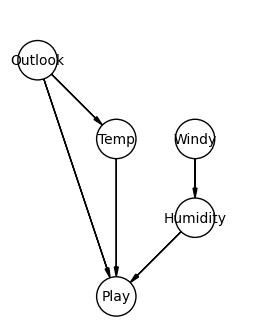

In [80]:
import daft
from daft import PGM
import matplotlib.pyplot as plt

pgm = PGM(shape=[3,4])


pgm.add_node(daft.Node('P', 'Play', 2,1))
pgm.add_node(daft.Node('H', 'Humidity', 3,2))
pgm.add_node(daft.Node('T', 'Temp', 2,3))
pgm.add_node(daft.Node('W', 'Windy', 3,3))
pgm.add_node(daft.Node('O', 'Outlook', 1,4))

pgm.add_edge('O', 'T')
pgm.add_edge('O', 'P')
pgm.add_edge('T', 'P')
pgm.add_edge('W', 'H')
pgm.add_edge('H', 'P')

pgm.render()
plt.show


In [81]:
import numpy as np
print( np.concatenate((x_test, np.reshape(y_test, (3,1))), axis=1))
print(convertFrame)


[[1 0 1 1 0]
 [1 2 0 0 1]
 [2 1 0 1 0]]
    Outlook  Temp  Humidity  Windy  Play
0         2     1         0      0     0
1         2     1         0      1     0
2         0     1         0      0     1
3         1     2         0      0     1
4         1     0         1      0     1
5         1     0         1      1     0
6         0     0         1      1     1
7         2     2         0      0     0
8         2     0         1      0     1
9         1     2         1      0     1
10        2     2         1      1     1
11        0     2         0      1     1
12        0     1         1      0     1
13        1     2         0      1     0


In [82]:
print(frame) 

   Outlook Temp Humidity Windy Play
0        S    H        I     F    N
1        S    H        I     T    N
2        O    H        I     F    Y
3        R    M        I     F    Y
4        R    C        N     F    Y
5        R    C        N     T    N
6        O    C        N     T    Y
7        S    M        I     F    N
8        S    C        N     F    Y
9        R    M        N     F    Y
10       S    M        N     T    Y
11       O    M        I     T    Y
12       O    H        N     F    Y
13       R    M        I     T    N


We see by visual inspection (BAD) that our indexes align with rows 1, 3, 5 in our original frame. So we use those data to feed our MAP query.

In [83]:
from pgmpy.inference import VariableElimination
infer = VariableElimination(model)

print(infer.map_query(['Play'], evidence={'Outlook': 'S', 'Temp': 'H', 'Humidity':'I', 'Windy' :'T'}))
print(infer.map_query(['Play'], evidence={'Outlook': 'R', 'Temp': 'M', 'Humidity':'I', 'Windy' :'F'}))
print(infer.map_query(['Play'], evidence={'Outlook': 'R', 'Temp': 'C', 'Humidity':'N', 'Windy' :'T'}))


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


{'Play': 'N'}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


{'Play': 'N'}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

{'Play': 'N'}


We get an accuracy of 66%, so the Bayes net performed better than our decision tree! 

In [84]:
print(infer.query(['Play'], evidence= {'Outlook': 'S', 'Temp': 'H', 'Humidity':'I', 'Windy' :'T'}))
print(infer.query(['Play'], evidence={'Outlook': 'R', 'Temp': 'M', 'Humidity':'I', 'Windy' :'F'}))
print(infer.query(['Play'], evidence={'Outlook': 'R', 'Temp': 'C', 'Humidity':'N', 'Windy' :'T'}))

+---------+-------------+
| Play    |   phi(Play) |
+=========+=============+
| Play(N) |      1.0000 |
+---------+-------------+
| Play(Y) |      0.0000 |
+---------+-------------+
+---------+-------------+
| Play    |   phi(Play) |
+=========+=============+
| Play(N) |      0.5000 |
+---------+-------------+
| Play(Y) |      0.5000 |
+---------+-------------+
+---------+-------------+
| Play    |   phi(Play) |
+=========+=============+
| Play(N) |      0.5000 |
+---------+-------------+
| Play(Y) |      0.5000 |
+---------+-------------+


We see above the probability distributions of the test set.